In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_ROS = pd.read_csv('../../../dataset/RecurrenceOfSurgeryData.csv')
df_ROS.head(2)

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


In [3]:
df_ROS_SKY = df_ROS[['입원기간','직업','환자통증정도','통증기간(월)','당뇨여부','심혈관질환','암발병여부']]
df_ROS_SKY[:2]

,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부
0,2,자영업,10,1.0,0,0,0
1,1,운동선수,10,1.0,0,0,0


In [4]:
df_ROS_SKY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   입원기간     1405 non-null   int64  
 1   직업       1405 non-null   object 
 2   환자통증정도   1405 non-null   int64  
 3   통증기간(월)  1405 non-null   float64
 4   당뇨여부     1405 non-null   int64  
 5   심혈관질환    1405 non-null   int64  
 6   암발병여부    1405 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 77.0+ KB


## * 데이터 갯수 확인(null값 여부)  (모든 데이터 카운트 일치로 확인)
## * 데이터 타입 변경 및 확인 (연속형 -> 범주형)
####  - 데이터 타입 변경 대상 컬럼 : '당뇨여부','심혈관질환','암발병여부'

In [5]:
df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']] = df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']].astype(str)

C:\Users\01-09\AppData\Local\Temp\ipykernel_10892\139356218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']] = df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']].astype(str)


In [6]:
df_ROS_SKY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   입원기간     1405 non-null   int64  
 1   직업       1405 non-null   object 
 2   환자통증정도   1405 non-null   int64  
 3   통증기간(월)  1405 non-null   float64
 4   당뇨여부     1405 non-null   object 
 5   심혈관질환    1405 non-null   object 
 6   암발병여부    1405 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 77.0+ KB


## 상관관계 확인
- 목표변수 : 입원기간
  - 연속형일 경우 : 정규화 확인
  - 범주형일 경우 : 밸런스 여부 확인
  
- 설명 변수 :
  - '직업' : '사무직','무직','자영업'을 가진 직업군이 입원기간이 상대적으로 길다.  
  - '당뇨여부' : 당뇨를 가지고 있는 환자의 입원기간이 상대적으로 길다.
  - '심혈관질환' : 심혈관질을 가지고 있는 환자는 입원기간이 상대적으로 길다.
  - '암발병여부' : 암미발병 환자의 입원이간이 상대적으로 길다.
  - '통증기간(월)' : 흡엽자는 재발율 상대적으로 높음.
  - '환자통증여부' : 상대적으로 나이 많으면 발생률이 높은 것으로 보임.


- 분석 story : 

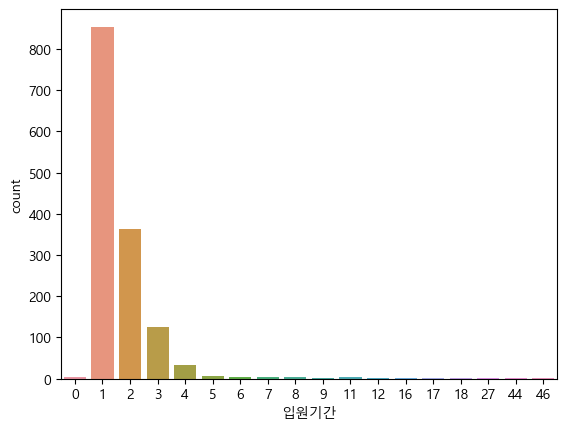

In [7]:
sns.countplot(data=df_ROS_SKY, x='입원기간')
plt.show()

### X : 연속형 / Y : 연속형

In [20]:
forpatient_list= df_ROS_SKY.describe().drop(columns=['입원기간']).columns.to_list() # 연속형 확인
forpatient_list

['환자통증정도', '통증기간(월)']

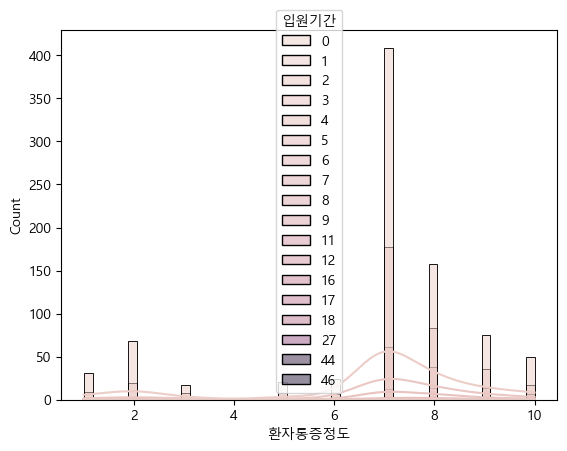

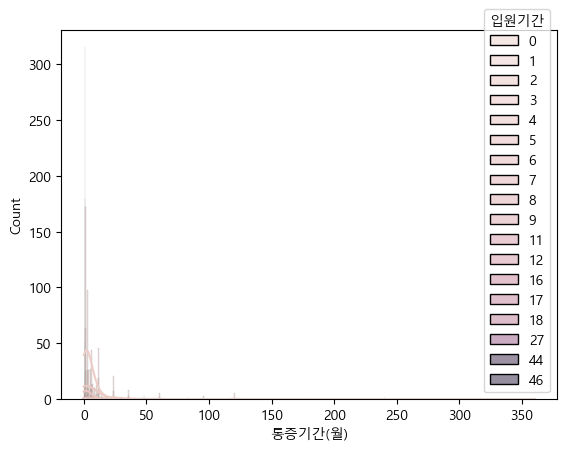

In [21]:
for item in forpatient_list :
    sns.histplot(data=df_ROS_SKY, x=item, kde=True, hue = '입원기간') # orient='h'목표변수 y에 위치하게끔
    plt.show()

### X: 범주형 / Y : 연속형

In [14]:
forpatient_object_list= df_ROS_SKY.describe(include=object).columns.to_list()
forpatient_object_list

['직업', '당뇨여부', '심혈관질환', '암발병여부']

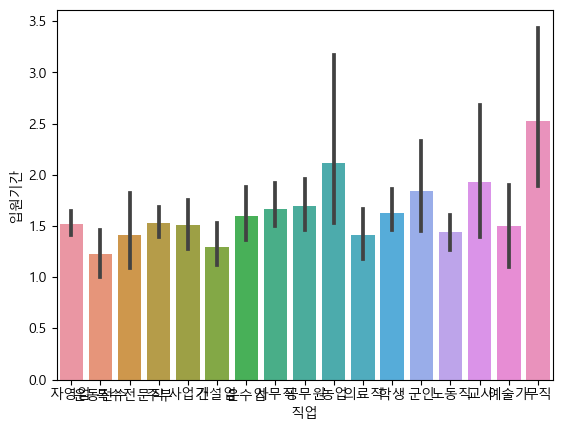

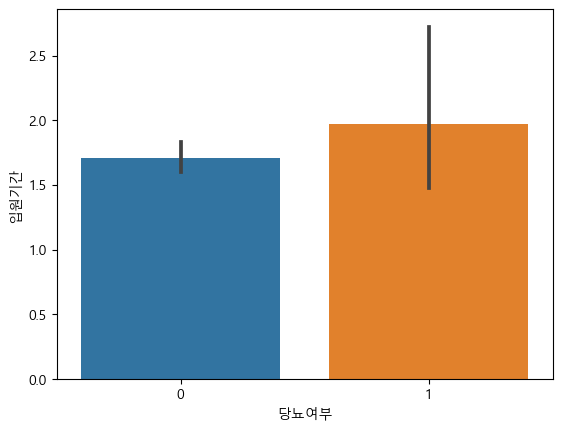

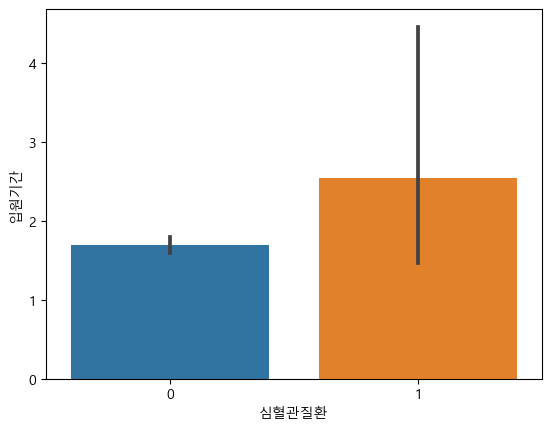

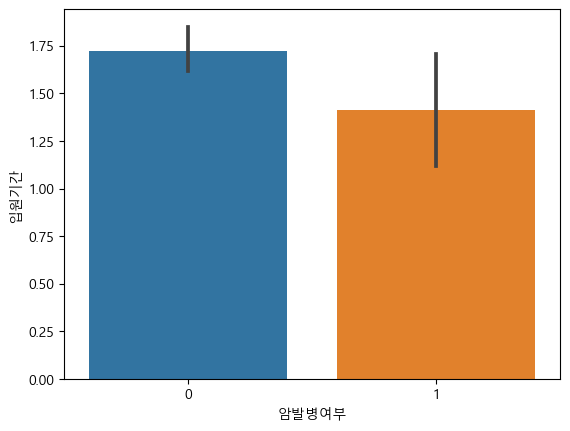

In [18]:
for item in forpatient_object_list :
    sns.barplot(data=df_ROS_SKY, x=item, y='입원기간')
    plt.show()

### 입원기간이 긴 직업군 TOP3 뽑아내기

In [23]:
df_ROS_job_sum = pd.pivot_table(data=df_ROS_SKY, index='직업', values='입원기간', aggfunc='sum' ) #총합으로 요약
df_ROS_job_top_list = df_ROS_job_sum .sort_values(by='입원기간', ascending=False).iloc[:7].index.to_list()
df_ROS_job_top_list

['사무직', '무직', '자영업', '학생', '군인', '주부', '공무원']

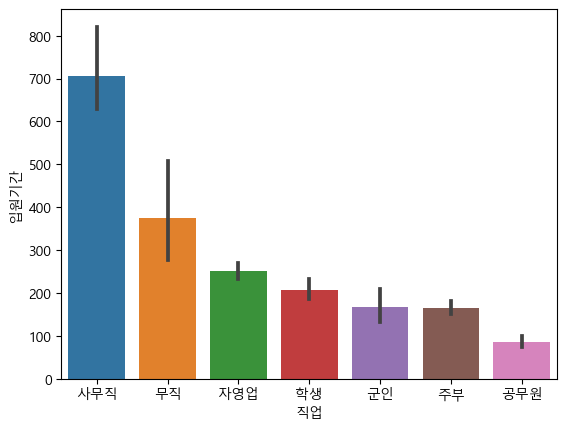

In [24]:
sns.barplot(data=df_ROS_SKY, x='직업', y='입원기간', estimator=sum, order=df_ROS_job_top_list) 
plt.show()